## Höffding hinnang

##### Höffdingi võrratus

Olgu $a_i \leq X_i \leq b_i$ ja $S_n = \sum_{i=1}^{n} X_i$

\begin{equation*}
    P ( \mid S_n - ES_n \mid \geq c ) \leq 2 \exp{ \left( - \frac{ 2 c^2 }{ \sum_{i=1}^{n} (b_i - a_i)^2 } \right) }
\end{equation*}

Kui $X_i \in \{ 0, 1 \} \implies S_n \sim Bin(n, p)$

\begin{equation*}
    P ( \mid \frac{ S_n }{ n } - p \mid \geq \frac{ c }{ n } ) \leq 2 \exp{ \left( - \frac{ 2 c^2 }{ n } \right) }
\end{equation*}

$\alpha \in [0, 1]$, siis Höffdingi võrratusest

\begin{equation*}
     \varepsilon := \frac{c}{n} = \sqrt{ - \frac{1}{2n} \ln{ \left( \frac{ 1 - \alpha }{2} \right) } }
\end{equation*}

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom

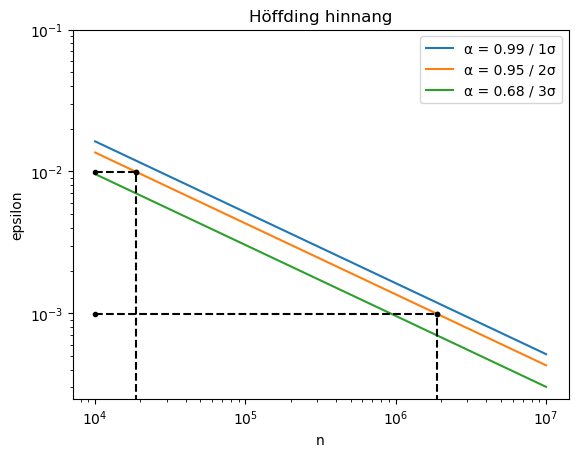

In [2]:
n = np.logspace(4, 7, num=100)
alpha = np.array([0.99, 0.95, 0.68])
epsilon_höffding = np.array([np.sqrt(- np.log((1 - a) / 2) / (2 * n)) for a in alpha])

for e in epsilon_höffding:
    plt.plot(n, e)

# epsilon = 1%
i = np.argmin(np.abs(epsilon_höffding[1] - 0.01))
plt.plot([n[0], n[i]], [epsilon_höffding[1][i], epsilon_höffding[1][i]], '.k--')
plt.plot([n[i], n[i]], [0, epsilon_höffding[1][i]], '.k--')

# epsilon = 0.1%
i = np.argmin(np.abs(epsilon_höffding[1] - 0.001))
plt.plot([n[0], n[i]], [epsilon_höffding[1][i], epsilon_höffding[1][i]], '.k--')
plt.plot([n[i], n[i]], [0, epsilon_höffding[1][i]], '.k--')

plt.title('Höffding hinnang')

plt.legend([f'α = {a} / {i + 1}σ' for i, a in enumerate(alpha)])

plt.xlabel('n')
plt.xscale('log')
plt.xticks(np.logspace(4, 7, num=4))

plt.ylabel('epsilon')
plt.yscale('log')
plt.yticks(np.logspace(-3, -1, num=3))

plt.show()

# TODO tabelid

## Täpne hinnang

Olgu $\alpha = 0.95$

\begin{equation*}
    P ( \mid \frac{ S_n }{ n } - p \mid \geq \varepsilon ) \leq 0.05 \iff P ( S_n \leq np - n \varepsilon ) \leq \frac{ 0.05 }{ 2 }
\end{equation*}

Olgu $q$ $0.025$ kvantiil / $2.5\%$ protsendipunkt, siis

\begin{equation*}
    \varepsilon = p - \frac{ q }{ n }
\end{equation*}

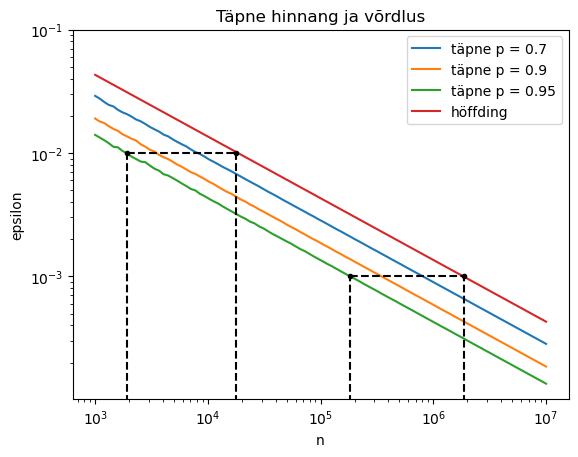

In [3]:
n = np.logspace(3, 7, num=100)
tõenäosused = np.array([0.7, 0.9, 0.95])
epsilon_täpne = np.array([p - binom.ppf(q=0.025, p=p, n=n) / n for p in tõenäosused])
epsilon_höffding = np.sqrt(- np.log(0.025) / (2 * n))

for e in epsilon_täpne:
    plt.plot(n, e)

plt.plot(n, epsilon_höffding)

# epsilon = 1%
i_täpne = np.argmin(np.abs(epsilon_täpne[2] - 0.01))
i_höffding = np.argmin(np.abs(epsilon_höffding - 0.01))

plt.plot([n[i_täpne], n[i_höffding]], [epsilon_täpne[2][i_täpne], epsilon_täpne[2][i_täpne]], '.k--')
plt.plot([n[i_täpne], n[i_täpne]], [0, epsilon_täpne[2][i_täpne]], 'k--')
plt.plot([n[i_höffding], n[i_höffding]], [0, epsilon_täpne[2][i_täpne]], 'k--')

# epsilon = 0.1%
i_täpne = np.argmin(np.abs(epsilon_täpne[2] - 0.001))
i_höffding = np.argmin(np.abs(epsilon_höffding - 0.001))

plt.plot([n[i_täpne], n[i_höffding]], [epsilon_täpne[2][i_täpne], epsilon_täpne[2][i_täpne]], '.k--')
plt.plot([n[i_täpne], n[i_täpne]], [0, epsilon_täpne[2][i_täpne]], 'k--')
plt.plot([n[i_höffding], n[i_höffding]], [0, epsilon_täpne[2][i_täpne]], 'k--')


plt.title('Täpne hinnang ja võrdlus')

plt.legend([f'täpne p = {p}' for p in tõenäosused] + ['höffding'])

plt.xlabel('n')
plt.xscale('log')
plt.xticks(np.logspace(3, 7, num=5))

plt.ylabel('epsilon')
plt.yscale('log')
plt.yticks(np.logspace(-3, -1, num=3))

plt.show()

# TODO tabelid

## Empiiriline testimine

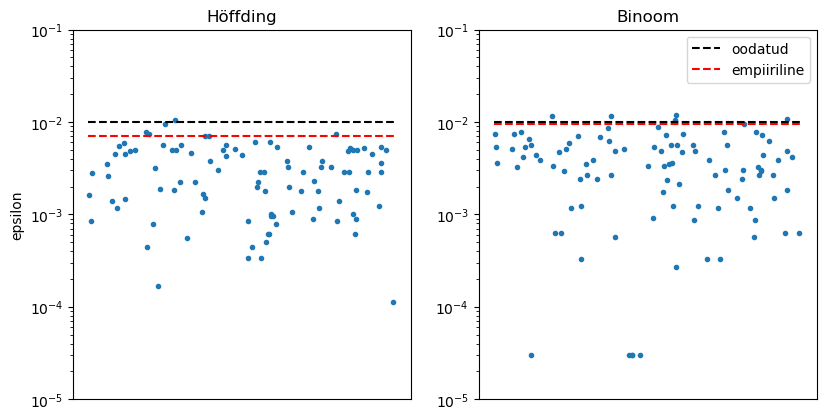

In [10]:
size = 100
i = int(size * 0.95) - 1
x = np.random.uniform(size=size)

plt.figure(figsize=[6.4 * 1.5, 4.8])

# höffding hinnang
plt.subplot(1, 2, 1)

# todo see pole vist päris õige
jaotus_höffding = np.abs(binom.rvs(p=0.5, n=17886, size=size) / 17886 - 0.5)  # hinnang on p-st sõltumatu
höffding_q95 = np.partition(jaotus_höffding, i)[i]

plt.plot([0, 1], [0.01, 0.01], 'k--')
plt.plot([0, 1], [höffding_q95, höffding_q95], 'r--')
plt.scatter(x, jaotus_höffding, marker='.')

plt.title('Höffding')
# plt.legend(['oodatud', 'empiiriline'])

plt.xticks([])

plt.ylabel('epsilon')
plt.yscale('log')
plt.yticks(np.logspace(-5, -1, num=5))

# täpne hinnang
plt.subplot(1, 2, 2)

jaotus_binoom = np.abs(binom.rvs(p=0.9, n=3351, size=size) / 3351 - 0.9)  # todo kust n tuli! sealt, kus epsilon_täpne == 0.01
binoom_q95 = np.partition(jaotus_binoom, i)[i]

plt.plot([0, 1], [0.01, 0.01], 'k--')
plt.plot([0, 1], [binoom_q95, binoom_q95], 'r--')
plt.scatter(x, jaotus_binoom, marker='.')

plt.title('Binoom')
plt.legend(['oodatud', 'empiiriline'])

plt.xticks([])

plt.yscale('log')
plt.yticks(np.logspace(-5, -1, num=5))

plt.show()